In [67]:
#params
d = 784
n = 32
N = 1000

T = 100
t = linspace(0,1300,T);

#need to get proper data... (note that this data is normalized)
data = randn((d,N));
Y = randn((d,N)); 

#which modes are we watching?
indexs = [1, 2, 3, 5, 12, 18, 31];

In [68]:
### Whiten the data -- i dont think this is working?!?
#Decorrelate with PCA
Ux, Sx, Vx = svd(data)
println(size(Ux),size(Sx),size(Vx))
X = transpose(Ux)*data
print(size(X))

(784,784)(784,)(1000,784)
(784,1000)

In [69]:
### SVD decomposition of covar(Y,X) -- covar also needs normalising?
Uyx,Syx,Vyx = svd(Y*transpose(X))
println(size(Uyx),size(Syx),size(Vyx))
Syx = Syx/sqrt(N)

(784,784)(784,)(784,784)


784-element Array{Float64,1}:
 70.2446   
 68.6817   
 67.5412   
 67.2758   
 66.8319   
 66.0603   
 65.8276   
 65.4583   
 65.328    
 65.232    
 64.4741   
 64.137    
 63.9061   
  ⋮        
  0.29287  
  0.261255 
  0.255452 
  0.236382 
  0.187575 
  0.16646  
  0.135036 
  0.11496  
  0.0732636
  0.0551269
  0.0315724
  0.0152024

In [80]:
### Initialize orthonormal weight matrices
#svd of some random matrix
#pick subset of n rows of U
R = svd(randn((784,784)))[1][1:n,:]

#???
D_a = diagm(randn(784))
D_b = diagm(randn(784))

#eqns from saxe
A = Uyx*D_a*transpose(R) #dxn
B = R*D_b*Vyx; #nxd
println(size(A),size(B))

(784,32)(32,784)


In [78]:
### now let's train it
#params
η = 0.1e-3;

0.0001

In [81]:
### Linear NN
LinearLoss(y,A,B,x) = ((norm(y-A*B*x))^2)/N
dLdA(y,A,B,x) =  transpose(-2*B*x*transpose(y) + B*x*transpose(x)*transpose(B)*transpose(A))
dLdB(y,A,B,x) =  transpose(-2*x*transpose(y)*A + x*transpose(x)*transpose(B)*transpose(A)*A)

println("Loss = ",LinearLoss(Y,A,B,X))
dA = dLdA(Y,A,B,X)
dB = dLdB(Y,A,B,X)
print("dA: ",size(dA),"  dB: ",size(dB))

Loss = 4.569501985778007
dA: (784,32)  dB: (32,784)

In [82]:
#function trainer(dLdA,dLdB)
modes = zeros((n,T))
for i in 1:T
    W = A*B
    U,S,V = svd(W)
    modes[1:n,i] = S[1:n]

    #grad descent -- am i supposed to be doing this with batches?
    A -= η*dLdA(Y,A,B,X)
    B -= η*dLdB(Y,A,B,X)
end
#    return modes
#end

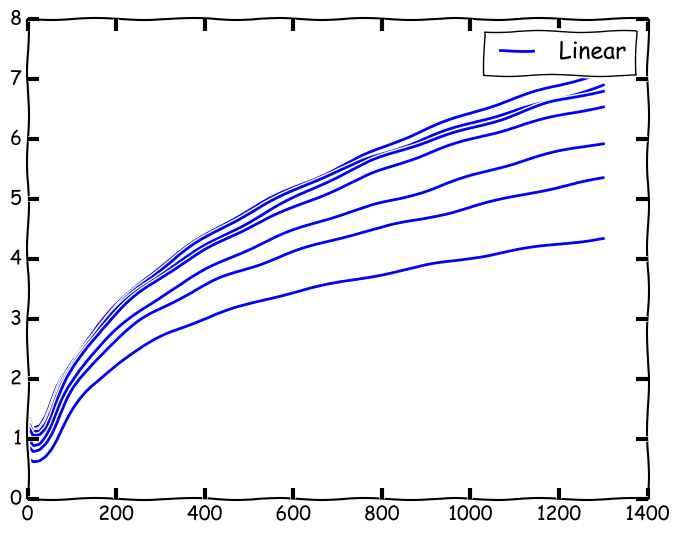

PyObject <matplotlib.legend.Legend object at 0x31ff0b320>

In [83]:
using PyPlot
xkcd();

#modes = trainer(dLdA,dLdB)
for i in indexs
    plot(t,reshape(modes[i,:],T),c="blue")
end
legend(["Linear"])

In [29]:
### Non-linear
# Rectifier
relu(x)= x .* (x .> 0)

reluLossA(A) = (norm(y - relu(A * relu(B*x)) ))^2
reluLossB(B) = (norm(y - relu(A * relu(B*x)) ))^2
using ReverseDiffOverload

dLdA = reversediff(reluLossA, A)
dLdB = reversediff(reluLossB, B)


# ELU



# Maxout (?)

LoadError: LoadError: ArgumentError: ReverseDiffOverload not found in path
while loading In[29], in expression starting on line 7

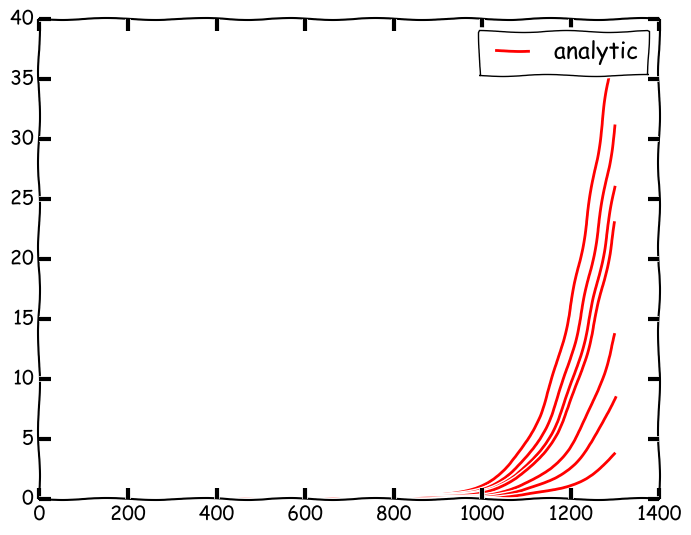

PyObject <matplotlib.legend.Legend object at 0x31799eef0>

In [84]:
### Analytic
f(t,tau,s,u0) = s*exp(2*s.*t/tau)./(exp(2*s.*t./tau) - 1 + s/u0)
for i in indexs
    plot(t,f(t,1/η,Syx[i],1e-6),c="red")
end
legend(["analytic"])